## 'Frozentissue,'BMI','DSMIV', 'DSMV', 'DSMV', 'Agonal_phase', 'Liver_class', 'Smoking_frequency','Pack_yrs_1_pktperday_1_yr', 'alcohol_intake_gmsperday', 'Total_drinking_yrs', 'Depression' and 'Anxiety' have missing values. 
## Need to think about how to impute the missing values or dropping the column.

In [5]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SUNumber                    143 non-null    float64
 1   IID                         143 non-null    object 
 2   RNAsequencedby              143 non-null    object 
 3   Frozentissue                136 non-null    object 
 4   BMI                         129 non-null    float64
 5   RIN                         143 non-null    float64
 6   Age                         143 non-null    int64  
 7   Gender                      143 non-null    object 
 8   Ethnicity                   143 non-null    object 
 9   Alc_status                  143 non-null    object 
 10  Classification              143 non-null    object 
 11  DSMIV_LF_added              143 non-null    object 
 12  DSMIV                       63 non-null     object 
 13  DSMV                        62 non-

In [4]:
meta.describe()

,SUNumber,BMI,RIN,Age,PM!,Brain_pH,Pack_yrs_1_pktperday_1_yr),AUDIT,alcohol_intake_gmsperday,Total_drinking_yrs,SR
count,143.000000,129.000000,143.000000,143.000000,143.000000,143.000000,69.000000,104.000000,104.000000,99.000000,143.00000
mean,410.100217,27.519380,6.889510,55.286713,29.750000,6.556573,34.594203,57.815385,116.350962,31.686869,72.00000
std,200.289286,6.557559,1.003775,11.770471,14.688641,0.271887,20.756515,72.320585,138.865595,11.428256,41.42463
min,59.000000,15.000000,4.500000,22.000000,7.500000,5.300000,2.000000,0.000000,0.000000,0.000000,1.00000
25%,244.000000,23.000000,6.100000,48.500000,18.750000,6.395000,20.000000,7.000000,14.000000,25.000000,36.50000
50%,367.000000,27.000000,7.000000,56.000000,27.000000,6.570000,32.000000,42.000000,80.000000,32.000000,72.00000
75%,598.500000,30.000000,7.600000,63.000000,38.250000,6.760000,46.000000,78.750000,168.000000,40.000000,107.50000
max,749.000000,57.000000,9.200000,82.000000,72.000000,7.020000,112.000000,420.000000,784.000000,55.000000,143.00000


<font size=5>Need to figure out what 'AUDIT', difference between 'Right' and 'Right**' in 'Frozentissue', 'RIN', 'Alcohol Use Disorder' vs 'Alcohol Use Disorder: AD pathology' in 'Classification'</font>

In [5]:
meta[meta.Alc_status == 'Control'].isna().sum()

SUNumber                       0
IID                            0
RNAsequencedby                 0
Frozentissue                   2
BMI                            7
RIN                            0
Age                            0
Gender                         0
Ethnicity                      0
Alc_status                     0
Classification                 0
DSMIV_LF_added                 0
DSMIV                         75
DSMV                          76
PM!                            0
Brain_pH                       0
COD_category                   0
Agonal_phase                   2
Liver_class                    9
Smoking_frequency              2
Pack_yrs_1_pktperday_1_yr)    43
AUDIT                         34
alcohol_intake_gmsperday      34
Total_drinking_yrs            39
Depression                    10
Anxiety                       10
SR                             0
dtype: int64

In [7]:
meta[meta.Alc_status == 'Alcoholic'].isna().sum()

SUNumber                       0
IID                            0
RNAsequencedby                 0
Frozentissue                   5
BMI                            7
RIN                            0
Age                            0
Gender                         0
Ethnicity                      0
Alc_status                     0
Classification                 0
DSMIV_LF_added                 0
DSMIV                          5
DSMV                           5
PM!                            0
Brain_pH                       0
COD_category                   0
Agonal_phase                   5
Liver_class                    5
Smoking_frequency              5
Pack_yrs_1_pktperday_1_yr)    31
AUDIT                          5
alcohol_intake_gmsperday       5
Total_drinking_yrs             5
Depression                     5
Anxiety                        5
SR                             0
dtype: int64

## Checking alcoholic and control alcohol intake per day 

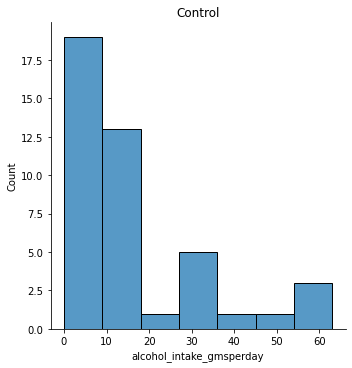

In [9]:
sns.displot(meta[meta.Alc_status == 'Control'].alcohol_intake_gmsperday)
plt.title('Control');

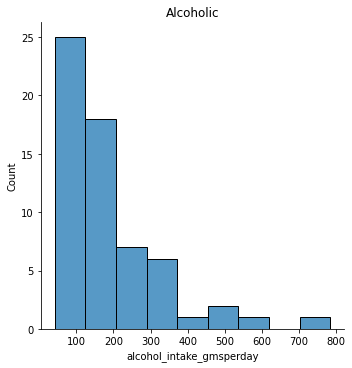

In [10]:
sns.displot(meta[meta.Alc_status == 'Alcoholic'].alcohol_intake_gmsperday)
plt.title('Alcoholic');

## Is it normal that the largest log2FC is only 0.31?

In [12]:
deseq.sort_values(by = 'padj', inplace = True)

In [13]:
deseq = deseq.reset_index(drop = True)

In [17]:
top20 = deseq.loc[:20,:]

In [21]:
top_20_rna = expression[expression.id.isin(top20.id)]
top_20_rna = top_20_rna.T

In [22]:
top_20_rna.columns = top_20_rna.loc['id',:]
top_20_rna.drop(['id'], axis = 0, inplace = True)
top_20_rna = top_20_rna.apply(pd.to_numeric)

In [98]:
merged_rna_meta = pd.merge(top_20_rna, meta, left_index = True, right_on = 'IID')

In [99]:
features = meta[['IID', 'RNAsequencedby', 'RIN', 'Age', 'Gender',
                 'Ethnicity', 'Classification', 'DSMIV_LF_added',
                 'PM!', 'Brain_pH', 'COD_category', 'Smoking_frequency', 'SR', 'Alc_status']]

In [101]:
features.loc[features['Smoking_frequency'].isna(), 'Smoking_frequency'] = '99 - Not reported'

C:\Users\bbche\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [103]:
smoke_dict = {'12 - Never in my life':0, '11 - Never  in the past year':1, '04 - 1 to 2 days per week':2, 
              '01 - Everyday/7days per week':3, '99 - Not reported':None}

In [104]:
features.Smoking_frequency = features.Smoking_frequency.map(smoke_dict)

C:\Users\bbche\anaconda3\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [106]:
alcoholic_mean = features[(features.Alc_status == 'Alcoholic')]['Smoking_frequency'].mean(skipna = True)
features.loc[((features.Alc_status == 'Alcoholic') & (features.Smoking_frequency.isna())), 'Smoking_frequency'] = alcoholic_mean

In [107]:
control_mean = features[(features.Alc_status == 'Control')]['Smoking_frequency'].mean(skipna = True)
features.loc[((features.Alc_status == 'Control') & (features.Smoking_frequency.isna())), 'Smoking_frequency'] = control_mean

In [110]:
cols_to_encode = ['RNAsequencedby', 'Gender', 'Ethnicity', 
                  'Classification', 'DSMIV_LF_added', 
                  'COD_category']
encoded_features = pd.get_dummies(features[cols_to_encode])

In [111]:
encoded_features['IID'] = features['IID']

In [112]:
numeric_cols = list(set(features.columns) - set(cols_to_encode))

In [113]:
numeric_cols

['SR',
 'IID',
 'Alc_status',
 'Smoking_frequency',
 'PM!',
 'Brain_pH',
 'RIN',
 'Age']

In [114]:
encoded_features = pd.merge(encoded_features, features[numeric_cols], left_on = 'IID', right_on = 'IID')

In [115]:
encoded_features_noID = encoded_features.drop(columns = ['IID', 'Alc_status'])

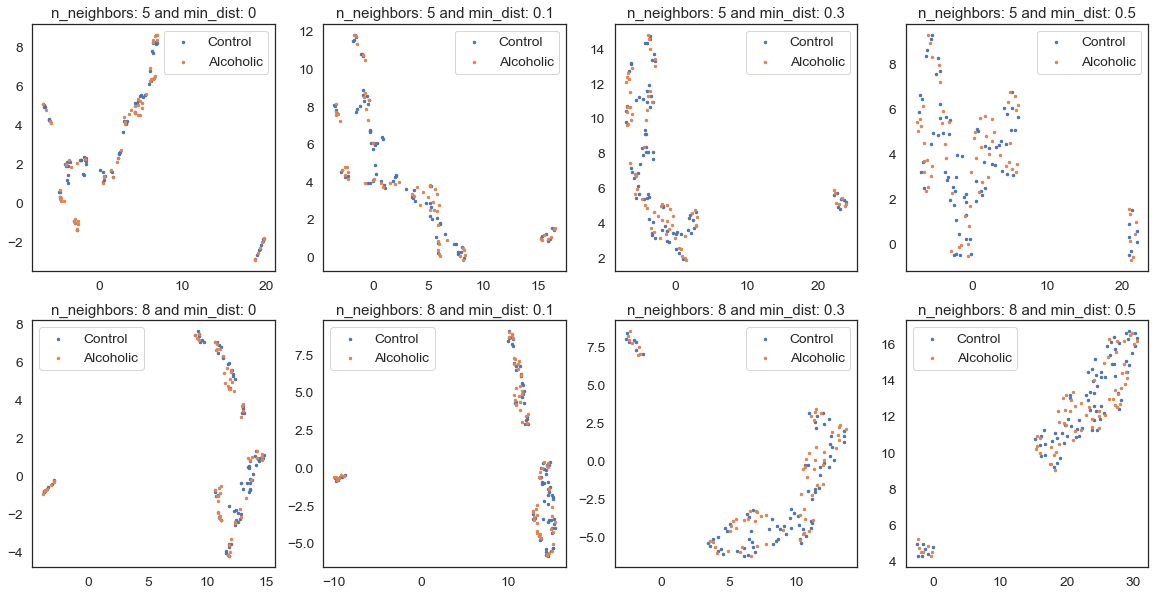

In [211]:
fig = plt.figure(figsize = (20,10))    
num = 1
for i in [5,8]:
    for j in [0, 0.1, 0.3, 0.5]:
        emb = umap.UMAP(n_neighbors = i, min_dist = j, random_state=42).fit_transform(encoded_features_noID)
        ax = fig.add_subplot(2,4, num)
        ax.scatter(emb[encoded_features.Alc_status == 'Control'][:, 0], emb[encoded_features.Alc_status == 'Control'][:, 1], s = 6, label = 'Control')
        ax.scatter(emb[encoded_features.Alc_status == 'Alcoholic'][:, 0], emb[encoded_features.Alc_status == 'Alcoholic'][:, 1], s = 6, label = 'Alcoholic')
        ax.set_title(f'n_neighbors: {i} and min_dist: {j}')
        ax.legend()
        num += 1

## Notice that the umap here didn't have 'alcohol_intake_gmsperday' included so the key that makes an alcoholic alcoholic was not included here. This means we have a good distribution of other features among the control and alcoholic

In [122]:
## n_neighbors = 5 worked the best
patient_emb = umap.UMAP(n_neighbors = 5, random_state=42).fit_transform(encoded_features_noID)

In [133]:
patient_emb_df = pd.DataFrame(patient_emb, index = features.IID)

In [138]:
# filter out patients not in the expression data
patient_emb_df = patient_emb_df[patient_emb_df.index.isin(expression.columns[1:])]

## Find patients with similar rna expression and see if it makes sense according to the patient history

In [143]:
rna = expression.iloc[:,1:].T

In [42]:
pca = PCA(n_components = 139)
rna_pca = pca.fit_transform(rna)

In [47]:
rna_pca_df = pd.DataFrame(rna_pca, index = expression.columns[1:])

In [145]:
from sklearn.metrics.pairwise import euclidean_distances
ed = euclidean_distances(rna_pca_df, rna_pca_df)

In [146]:
ed.shape

(139, 139)

<AxesSubplot:>

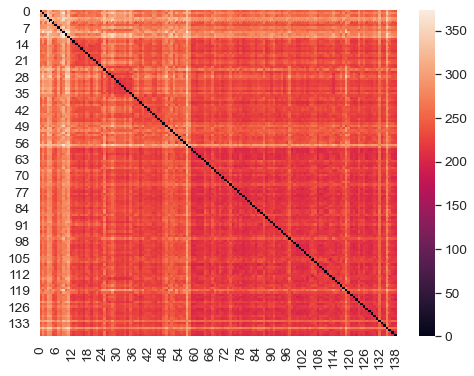

In [147]:
sns.set(rc={'figure.figsize':(8,6)},font_scale=1.25)
sns.set_style("white")
sns.heatmap(ed)

In [148]:
ed_df = pd.DataFrame(ed, index = expression.columns[1:], columns = expression.columns[1:])

In [149]:
ed_df.head()

,X214,X460,X584,X551,X530,X571,X327,X723,X637,X656,...,X693,X88.225,X88.274,X88.304,X89.221,X89.577,X89.61,X90.92,X94,X97
X214,0.000005,286.633181,268.311496,328.328908,311.566010,260.829401,279.852856,285.124072,313.636865,315.213879,...,240.855308,253.288861,249.862794,297.953548,240.484271,252.836417,310.547298,263.104366,245.941541,236.484207
X460,286.633181,0.000000,294.947637,335.894428,300.818970,310.651549,293.939806,290.203940,327.214306,370.748218,...,268.890133,284.429521,275.331589,301.582401,270.420109,269.183405,342.033201,287.383264,284.618718,273.387606
X584,268.311496,294.947637,0.000000,341.793762,322.458490,260.932386,291.063152,290.563077,316.497112,331.488186,...,255.609289,263.424495,253.018073,308.771709,244.182127,260.448574,315.315418,271.504230,253.297674,248.239743
X551,328.328908,335.894428,341.793762,0.000000,323.844888,335.372653,304.216604,328.957474,317.309906,355.598038,...,289.235965,306.201616,284.221939,322.434259,284.371279,288.035570,345.466601,312.583654,289.494782,284.461057
X530,311.566010,300.818970,322.458490,323.844888,0.000004,320.981055,302.419993,305.054202,325.157673,361.640712,...,279.862975,302.192869,285.216011,313.966313,280.166568,282.559345,345.303228,301.123252,285.775526,278.303503


In [188]:
index_to_print = []
for pair in np.argwhere(ed_df.values < 195):
    if pair[0] != pair[1]:
        if pair[0] not in index_to_print:
            index_to_print.append(pair[0])
        if pair[1] not in index_to_print:
            index_to_print.append(pair[1])

In [189]:
index_to_print

[63, 108, 106, 113]

In [178]:
ed_df.index[index_to_print]

Index(['X180', 'X353', 'X190', 'X239', 'X228', 'X259', 'X326', 'X510', 'X339',
       'X401', 'X97', 'X513'],
      dtype='object')

In [181]:
patient_emb_df.head(2)

,0,1
IID,,
X214,16.193111,1.037678
X460,16.445023,1.416492


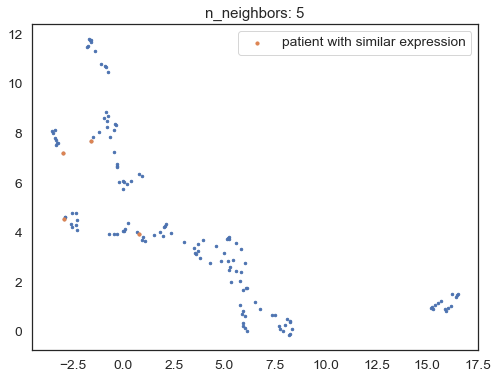

In [190]:
plt.scatter(patient_emb_df[0], patient_emb_df[1], s = 6)
plt.scatter(patient_emb_df.loc[ed_df.index[index_to_print],0], patient_emb_df.loc[ed_df.index[index_to_print],1], s = 10, label = 'patient with similar expression')
plt.title('n_neighbors: 5')
plt.legend()

In [ ]:
## genes with high variability. where are they in DE seq table? are they there? if so, how's the logFC

In [192]:
patient_emb_df[patient_emb_df[0] > 15].index

Index(['X214', 'X460', 'X584', 'X551', 'X530', 'X571', 'X327', 'X723', 'X637',
       'X656', 'X620', 'X567', 'X302', 'X646'],
      dtype='object', name='IID')

In [ ]:
## The other way around: when patients have similar history, do their expression look similar?

In [194]:
ed_df.loc['X214', 'X460']

286.6331807625848

In [195]:
ed_df.loc['X214', 'X584']

268.3114963597518

In [83]:
similar_pairs = []
for pair in np.argwhere(ed < 125):
    if pair[0] != pair[1]:
        similar_pairs.append(pair)

(139, 139)

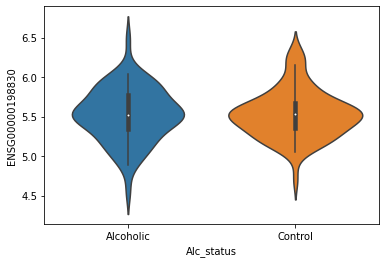

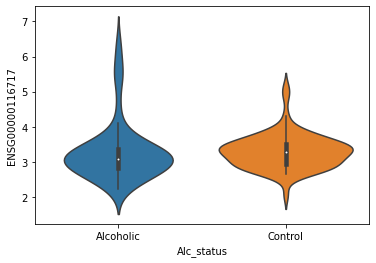

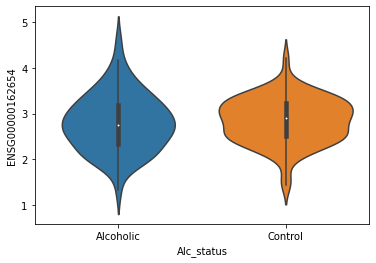

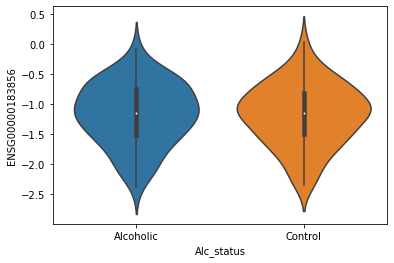

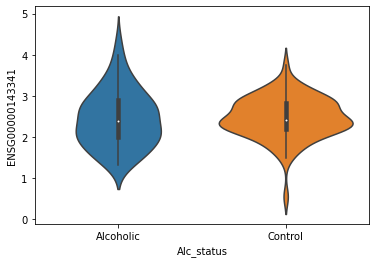

In [99]:
for col in merged_rna_meta.columns[:5]:
    sns.violinplot(x = 'Alc_status', y = col, data = merged_rna_meta)
    plt.show()
    plt.close()

In [71]:
merged_rna_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 141
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ENSG00000198830             139 non-null    object 
 1   ENSG00000116717             139 non-null    object 
 2   ENSG00000162654             139 non-null    object 
 3   ENSG00000183856             139 non-null    object 
 4   ENSG00000143341             139 non-null    object 
 5   ENSG00000116711             139 non-null    object 
 6   ENSG00000081248             139 non-null    object 
 7   ENSG00000117009             139 non-null    object 
 8   ENSG00000107562             139 non-null    object 
 9   ENSG00000138336             139 non-null    object 
 10  ENSG00000198408             139 non-null    object 
 11  ENSG00000142089             139 non-null    object 
 12  ENSG00000170959             139 non-null    object 
 13  ENSG00000214872             139 non

## Next, see if the genes with similar weights are indeed similar in the expression level